In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly as pl
import scipy.optimize as opt
from scipy.io import loadmat
import seaborn as sns
import matplotlib as mpl


In [2]:
data=loadmat('machine-learning-ex7\ex7\ex7data1.mat')

In [3]:
X=data['X']

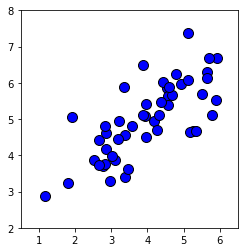

In [4]:
#  Visualize the example dataset
plt.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=1)
plt.axis([0.5, 6.5, 2, 8])
plt.gca().set_aspect('equal')
plt.grid(False)

In [5]:
def featurenormalize(X):    
    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm /= sigma
    return X_norm, mu, sigma

In [10]:
X_norm,mu,sigma=featurenormalize(X)
U,S=runpca(X_norm)

50 2
[[0.98       0.72081977]
 [0.72081977 0.98      ]]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [9]:
def runpca(X):
    m,n=X.shape
    print(m,n)
    U=np.zeros(n)
    S=np.zeros(n)
    sigma=(1/m)*(np.dot(X.T,X))
    print(sigma)
    U,S,V =np.linalg.svd(sigma)
    print(U)
    return U,S

Top eigenvector: U[:, 0] = [-0.707107 -0.707107]
 (you should expect to see [-0.707107 -0.707107])


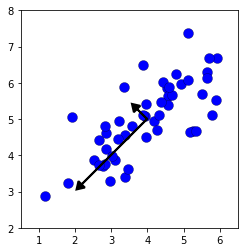

In [11]:
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=0.25)

for i in range(2):
    ax.arrow(mu[0], mu[1], 1.5 * S[i]*U[0, i], 1.5 * S[i]*U[1, i],
             head_width=0.25, head_length=0.2, fc='k', ec='k', lw=2, zorder=1000)

ax.axis([0.5, 6.5, 2, 8])
ax.set_aspect('equal')
ax.grid(False)

print('Top eigenvector: U[:, 0] = [{:.6f} {:.6f}]'.format(U[0, 0], U[1, 0]))
print(' (you should expect to see [-0.707107 -0.707107])')

In [12]:
def projectdata(U,X,k):
    z=np.zeros((X.shape[0],k))
    z=np.dot(X,U[:,:k])
    return z

In [13]:
#project data
k=1
Z=projectdata(U,X_norm,k)

In [16]:
#recover data
print(Z.shape,U.shape)
X_rec=recoverdata(U,Z,k)

(50, 1) (2, 2)


In [15]:
def recoverdata(U,Z,k):
    X_rec = np.zeros((Z.shape[0], U.shape[0]))
    X_rec=np.dot(Z,U[:,:k].T)
    
    return X_rec

Approximation of the first example: [-1.047419 -1.047419]
       (this value should be about  [-1.047419 -1.047419])


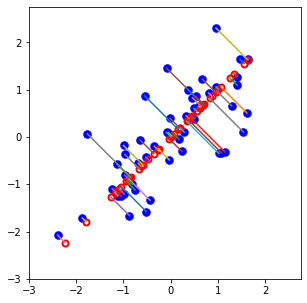

In [17]:
print('Approximation of the first example: [{:.6f} {:.6f}]'.format(X_rec[0, 0], X_rec[0, 1]))
print('       (this value should be about  [-1.047419 -1.047419])')

#  Plot the normalized dataset (returned from featureNormalize)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(X_norm[:, 0], X_norm[:, 1], 'bo', ms=8, mec='b', mew=0.5)
ax.set_aspect('equal')
ax.grid(False)
plt.axis([-3, 2.75, -3, 2.75])

# Draw lines connecting the projected points to the original points
ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', mec='r', mew=2, mfc='none')
ax.plot([X_rec[:,0],X_norm[:,0]],[X_rec[:,1],X_norm[:,1]])
plt.show()

In [20]:
# PCA on face Image dataset

datapca=loadmat('machine-learning-ex7\ex7\ex7faces.mat')

In [22]:
X=datapca['X']

In [69]:
def displaydata(X):
    fig,ax=plt.subplots(10,10,figsize=(10,10))
    k=-2
    for i in range(10):
        k=k+1
        for j in range(10):
            k=k+1
            ax[i][j].imshow(X[k].reshape(32,32,order='F'),cmap='gray')
            ax[i][j].axis('off')

In [58]:
# to run paca first normalzie the data

X_norm,mu,sigma=featurenormalize(X)

In [63]:
U,S=runpca(X_norm)

5000 1024
[[0.9998     0.97744373 0.92594943 ... 0.00928093 0.0178927  0.02341975]
 [0.97744373 0.9998     0.97289266 ... 0.01073793 0.01996704 0.02498727]
 [0.92594943 0.97289266 0.9998     ... 0.01008709 0.02066669 0.02642972]
 ...
 [0.00928093 0.01073793 0.01008709 ... 0.9998     0.96216308 0.8892377 ]
 [0.0178927  0.01996704 0.02066669 ... 0.96216308 0.9998     0.96446028]
 [0.02341975 0.02498727 0.02642972 ... 0.8892377  0.96446028 0.9998    ]]
[[-0.01425307 -0.03606596 -0.04561884 ...  0.00521903  0.00091143
   0.00077515]
 [-0.01474233 -0.03809858 -0.04756249 ... -0.01142763 -0.00228691
  -0.00434598]
 [-0.01501482 -0.03988747 -0.05082085 ...  0.01843345  0.00554132
   0.00873415]
 ...
 [-0.00895052  0.03119618 -0.05691806 ...  0.0011493   0.00452914
  -0.01218846]
 [-0.00769526  0.0290752  -0.05579144 ... -0.00103011 -0.00647834
   0.00752741]
 [-0.00692969  0.02725819 -0.05339471 ...  0.00266801  0.00543461
  -0.00218828]]


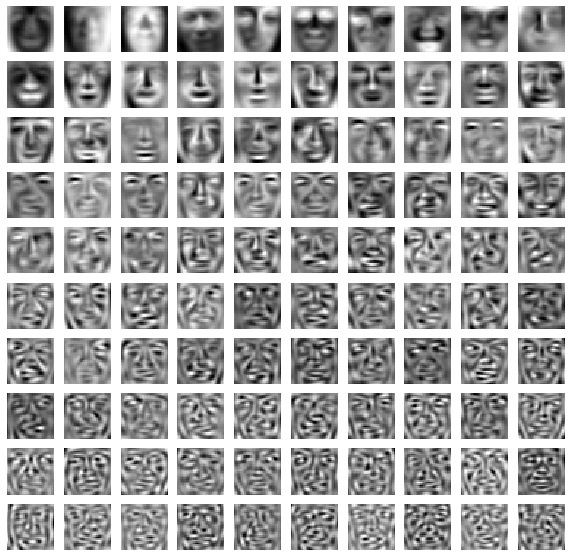

In [73]:
displaydata(U.T)

In [74]:
k=100
Z=projectdata(U,X_norm,k)

In [77]:
X_rec=recoverdata(U,Z,k)

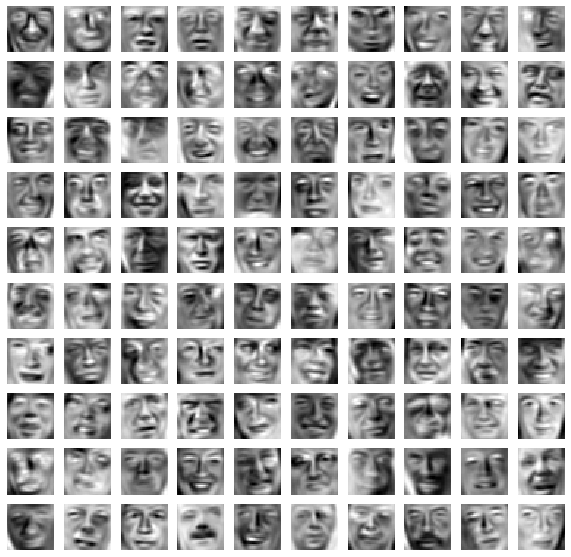

In [80]:
displaydata(X_rec)